Saving IMG-20240227-WA0026.jpg to IMG-20240227-WA0026.jpg
Image uploaded successfully.


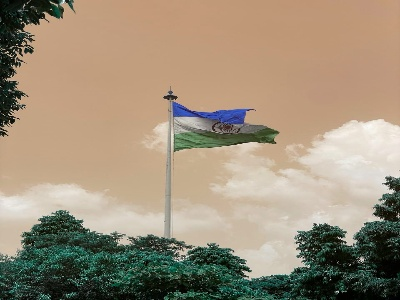

Original Image Size: 960x1280 (Width x Height)
Total Pixels: 1228800


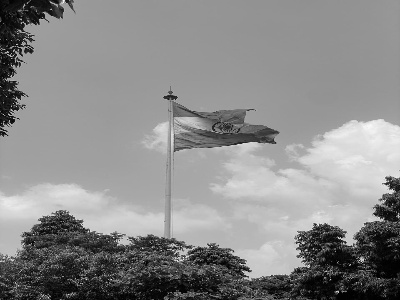

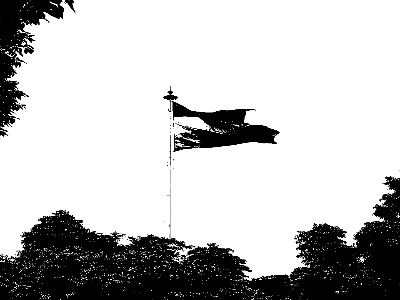

Black Pixels Count: 302879


In [ ]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import display
from PIL import Image

uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename

img = cv2.imread(image_path)
if img is None:
    print("Error: Could not read the image.")
else:
    print("Image uploaded successfully.")

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image (e.g., width = 400, height = 400)
    img_rgb_resized = cv2.resize(img_rgb, (400, 300))
    cv2.imwrite("image_rgb_resized.jpg", img_rgb_resized)

    # Display the resized RGB image
    display(Image.open("image_rgb_resized.jpg"))

    # Extract image size
    height, width, channels = img.shape
    print(f"Original Image Size: {width}x{height} (Width x Height)")

    # Calculate total pixels
    total_pixels = height * width
    print(f"Total Pixels: {total_pixels}")

    # Convert to Grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the grayscale image
    img_gray_resized = cv2.resize(img_gray, (400, 300))
    cv2.imwrite("image_gray_resized.jpg", img_gray_resized)

    # Display the resized Grayscale image
    display(Image.open("image_gray_resized.jpg"))

    # Convert to Binary using threshold
    _, img_binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

    # Resize the binary image
    img_binary_resized = cv2.resize(img_binary, (400, 300))
    cv2.imwrite("image_binary_resized.jpg", img_binary_resized)

    # Display the resized Binary image
    display(Image.open("image_binary_resized.jpg"))

    # Count black pixels in the Binary image
    black_pixels = np.sum(img_binary == 0)
    print(f"Black Pixels Count: {black_pixels}")


Saving IMG-20240227-WA0026.jpg to IMG-20240227-WA0026.jpg
Image uploaded successfully.


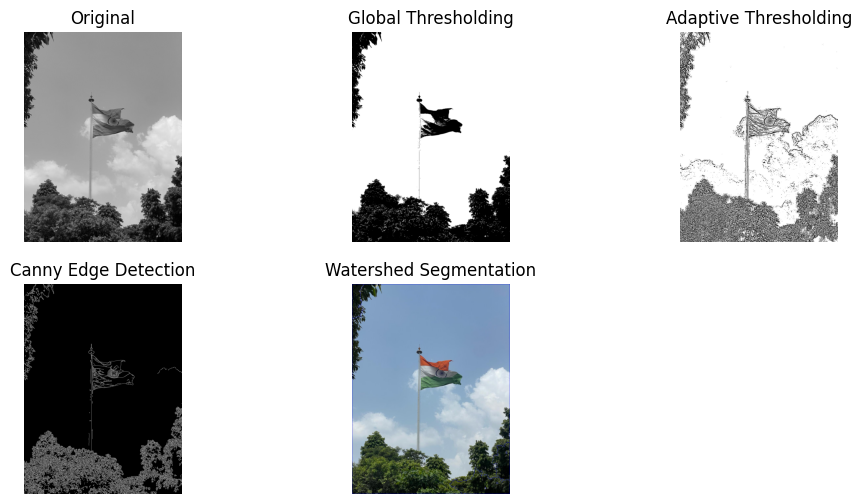

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename

# Read the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Could not read the image.")
else:
    print("Image uploaded successfully.")

    # 1. Global Thresholding
    _, global_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # 2. Adaptive Thresholding
    adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # 3. Edge Detection (Canny Edge Detection)
    edges = cv2.Canny(img, 100, 200)

    # 4. Region-Based Segmentation (Watershed Algorithm)
    img_color = cv2.imread(image_path)  # Read the original image in color
    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Convert to binary
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Noise removal using Morphology (Opening)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1  # Increment all labels by 1
    markers[unknown == 255] = 0  # Mark the unknown region as 0

    # Apply Watershed
    cv2.watershed(img_color, markers)
    img_color[markers == -1] = [255, 0, 0]  # Mark boundaries in red

    # Display results
    titles = ["Original", "Global Thresholding", "Adaptive Thresholding", "Canny Edge Detection", "Watershed Segmentation"]
    images = [img, global_thresh, adaptive_thresh, edges, img_color]

    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.subplot(2, 3, i + 1)
        if i == 4:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying color images
        else:
            plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()